  #           CadioVascular Diseases(CDV) prediction-using DeepLearning

![title](https://www.helsinki.fi/sites/default/files/styles/12_7_medium/public/thumbnails/image/pixmac_1.jpg?itok=XlSVgZRm)

In [93]:
import pandas as pd
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
plt.show()
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

from sklearn import preprocessing

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K

In [2]:
data=pd.read_csv("cardio_train.csv",sep=";",index_col="id")

In [3]:
data.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
8,21914,1,151,67.0,120,80,2,2,0,0,0,0
9,22113,1,157,93.0,130,80,3,1,0,0,1,0
12,22584,2,178,95.0,130,90,3,3,0,0,1,1
13,17668,1,158,71.0,110,70,1,1,0,0,1,0


In [4]:
data.size

840000

In [5]:
data.shape

(70000, 12)

In [6]:
data.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [8]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

Number of variables,13
Number of observations,70000
Total Missing (%),0.0%
Total size in memory,6.9 MiB
Average record size in memory,104.0 B
Numeric,8
Categorical,0
Boolean,5
Date,0
Text (Unique),0
Rejected,0


In [9]:
data["age"]=data["age"].apply(lambda x:x/365)

In [10]:
data["age"]=data["age"].apply(lambda x: round(x))


In [11]:
data["height"]=data["height"].apply(lambda x:round(x/100,2))

In [12]:
data["height"].head(10)

id
0     1.68
1     1.56
2     1.65
3     1.69
4     1.56
8     1.51
9     1.57
12    1.78
13    1.58
14    1.64
Name: height, dtype: float64

In [14]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,1.643592,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.765294,0.476838,0.082101,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,0.550000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,1.590000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,1.650000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,1.700000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,2.500000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
data[(data["ap_hi"]<40) | (data["ap_lo"]<40)].groupby(["cardio"]).count()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,
0,126,126,126,126,126,126,126,126,126,126,126
1,116,116,116,116,116,116,116,116,116,116,116


In [16]:
data[(data["ap_hi"]<40)].groupby(["cardio"]).count()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,
0,94,94,94,94,94,94,94,94,94,94,94
1,94,94,94,94,94,94,94,94,94,94,94


In [17]:
data[(data["ap_lo"]<40)].groupby(["cardio"]).count()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,
0,34,34,34,34,34,34,34,34,34,34,34
1,25,25,25,25,25,25,25,25,25,25,25


In [18]:
data=data[data.ap_lo>=40] #remove data that un reasonable

In [19]:
data=data[data.ap_hi>=40]

In [20]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69758.000000,69758.000000,69758.000000,69758.000000,69758.000000,69758.000000,69758.00000,69758.000000,69758.000000,69758.000000,69758.000000,69758.000000
mean,53.340778,1.349566,1.643609,74.211636,129.077511,96.691061,1.36727,1.226669,0.088277,0.053829,0.803793,0.499771
std,6.764610,0.476836,0.081918,14.397736,153.979751,188.581826,0.68060,0.572508,0.283699,0.225681,0.397130,0.500004
min,30.000000,1.000000,0.550000,10.000000,60.000000,40.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,1.590000,65.000000,120.000000,80.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,1.650000,72.000000,120.000000,80.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,1.700000,82.000000,140.000000,90.000000,2.00000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,2.500000,200.000000,16020.000000,11000.000000,3.00000,3.000000,1.000000,1.000000,1.000000,1.000000


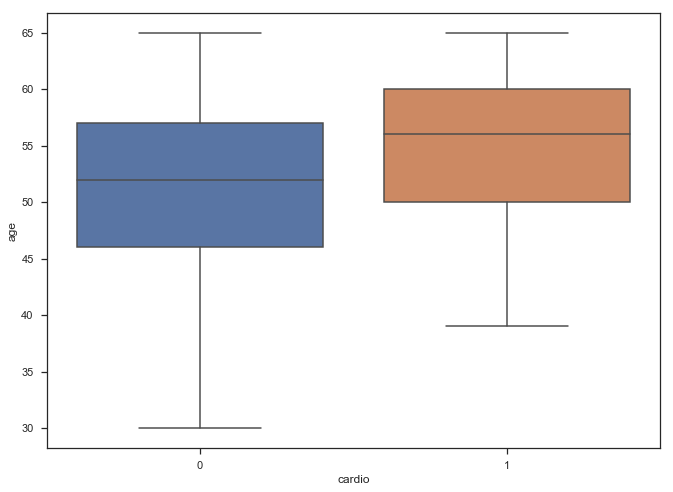

In [55]:
sns.boxplot(x='cardio',y='age',data=data)

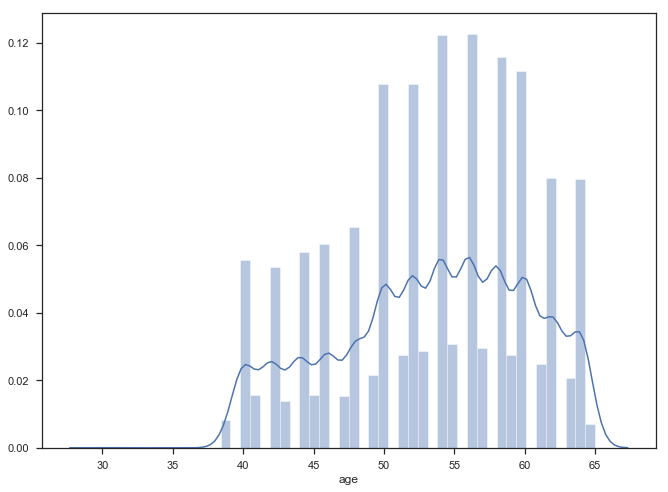

In [56]:
sns.distplot(data['age'])

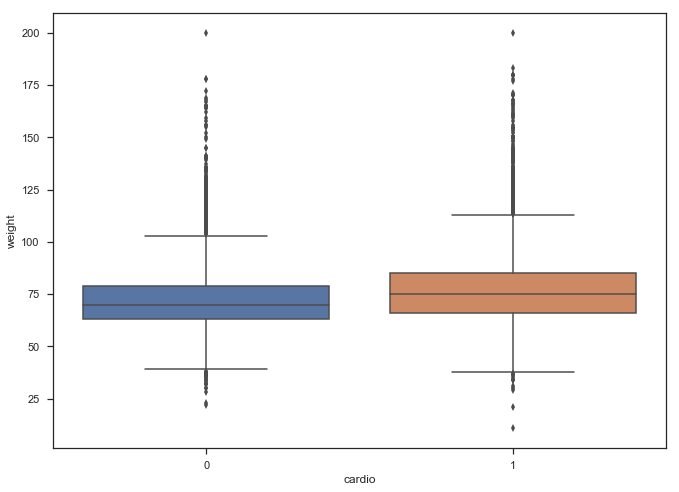

In [57]:
sns.boxplot(x='cardio',y='weight',data=data)

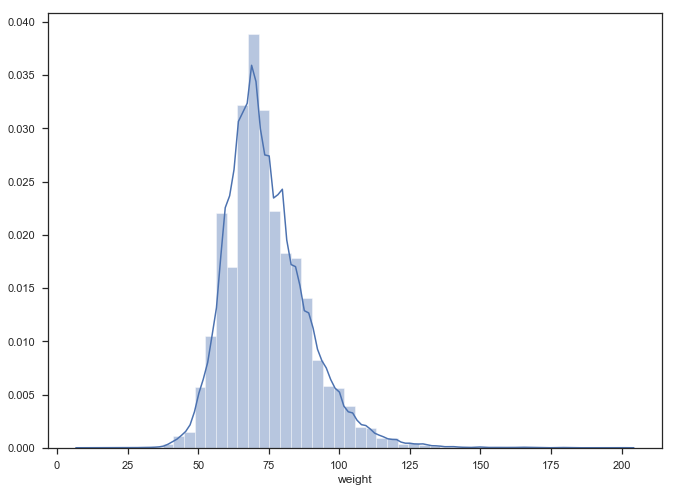

In [58]:
sns.distplot(data['weight'])

In [26]:
data[data['weight']>100].groupby(["cardio"]).count()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,
0,999,999,999,999,999,999,999,999,999,999,999
1,2244,2244,2244,2244,2244,2244,2244,2244,2244,2244,2244


In [27]:
data[data['weight']<50].groupby(["cardio"]).count()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,
0,712,712,712,712,712,712,712,712,712,712,712
1,272,272,272,272,272,272,272,272,272,272,272


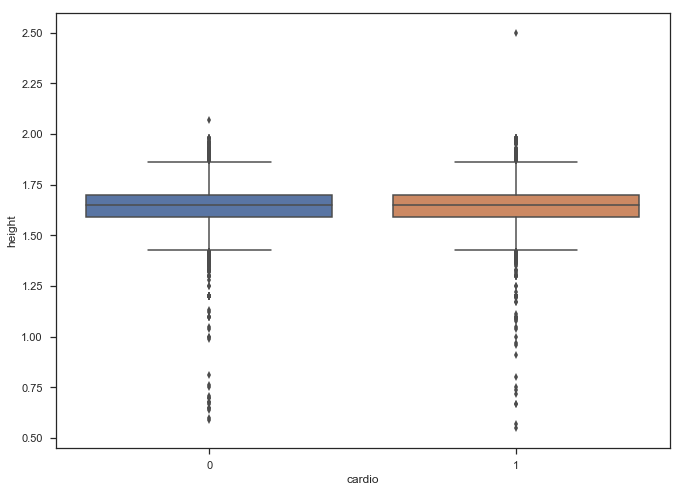

In [59]:
sns.boxplot(x='cardio',y='height',data=data)

In [29]:
data[data['ap_hi']>200].groupby(["cardio"]).count()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,
0,19,19,19,19,19,19,19,19,19,19,19
1,74,74,74,74,74,74,74,74,74,74,74


In [30]:
data=data[data['ap_hi']<=200]

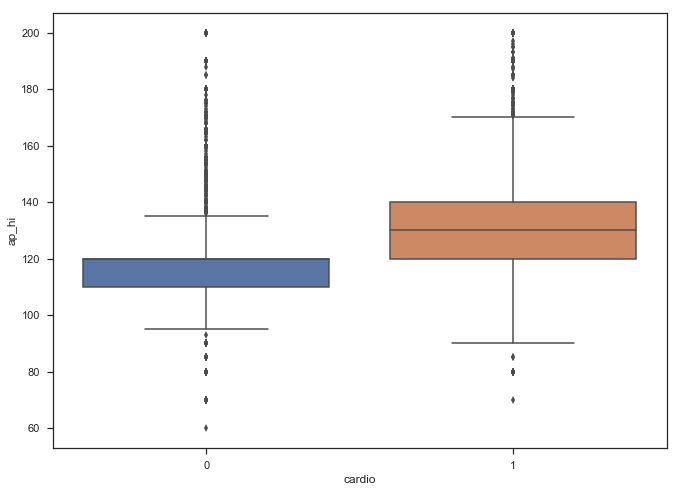

In [60]:
sns.boxplot(x='cardio',y='ap_hi',data=data)

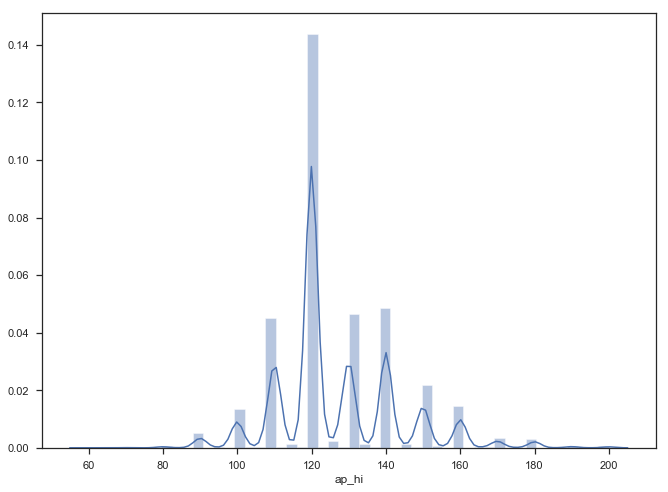

In [61]:
sns.distplot(data['ap_hi'])

In [33]:
data=data[data['ap_lo']<200]

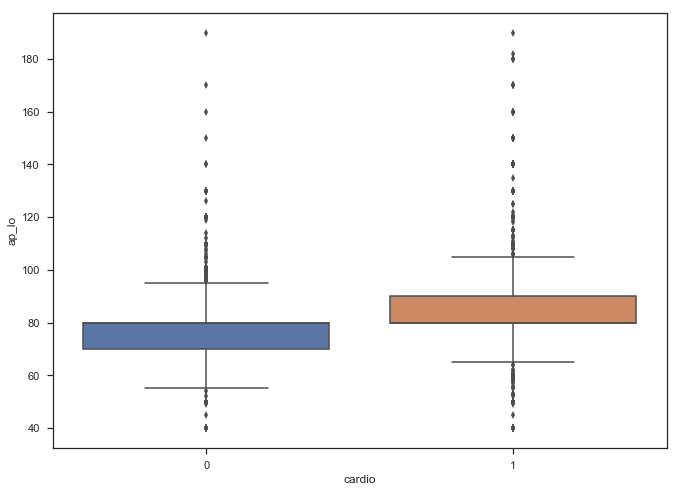

In [62]:
sns.boxplot(x='cardio',y='ap_lo',data=data)

In [35]:
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

In [36]:
rstr(data, "cardio").sort_values(by='corr cardio', ascending=False)

Data shape: (68723, 12)
___________________________
Data types:
 int64      10
float64     2
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing_ration,uniques,skewness,kurtosis,corr cardio
cardio,int64,68723,2,0,0.0,"[[0.0, 1.0]]",0.021334,-1.999603,1.000000
ap_hi,int64,68723,102,0,0.0,"[[110.0, 140.0, 130.0, 150.0, 100.0, 120.0, 14...",0.818693,1.327372,0.427550
ap_lo,int64,68723,84,0,0.0,"[[80.0, 90.0, 70.0, 100.0, 60.0, 85.0, 89.0, 1...",0.613012,4.068199,0.335297
age,int64,68723,28,0,0.0,"[[50.0, 55.0, 52.0, 48.0, 60.0, 61.0, 62.0, 54...",-0.304830,-0.823974,0.239139
cholesterol,int64,68723,3,0,0.0,"[[1.0, 3.0, 2.0]]",1.597701,1.028023,0.221425
weight,float64,68723,281,0,0.0,"[[62.0, 85.0, 64.0, 82.0, 56.0, 67.0, 93.0, 95...",1.007251,2.560414,0.179681
gluc,int64,68723,3,0,0.0,"[[1.0, 2.0, 3.0]]",2.402241,4.315985,0.089963
gender,int64,68723,2,0,0.0,"[[2.0, 1.0]]",0.635568,-1.596099,0.006978
alco,int64,68723,2,0,0.0,"[[0.0, 1.0]]",3.963172,13.707133,-0.008378
height,float64,68723,106,0,0.0,"[[1.68, 1.56, 1.65, 1.69, 1.51, 1.57, 1.78, 1....",-0.608854,7.591305,-0.010918


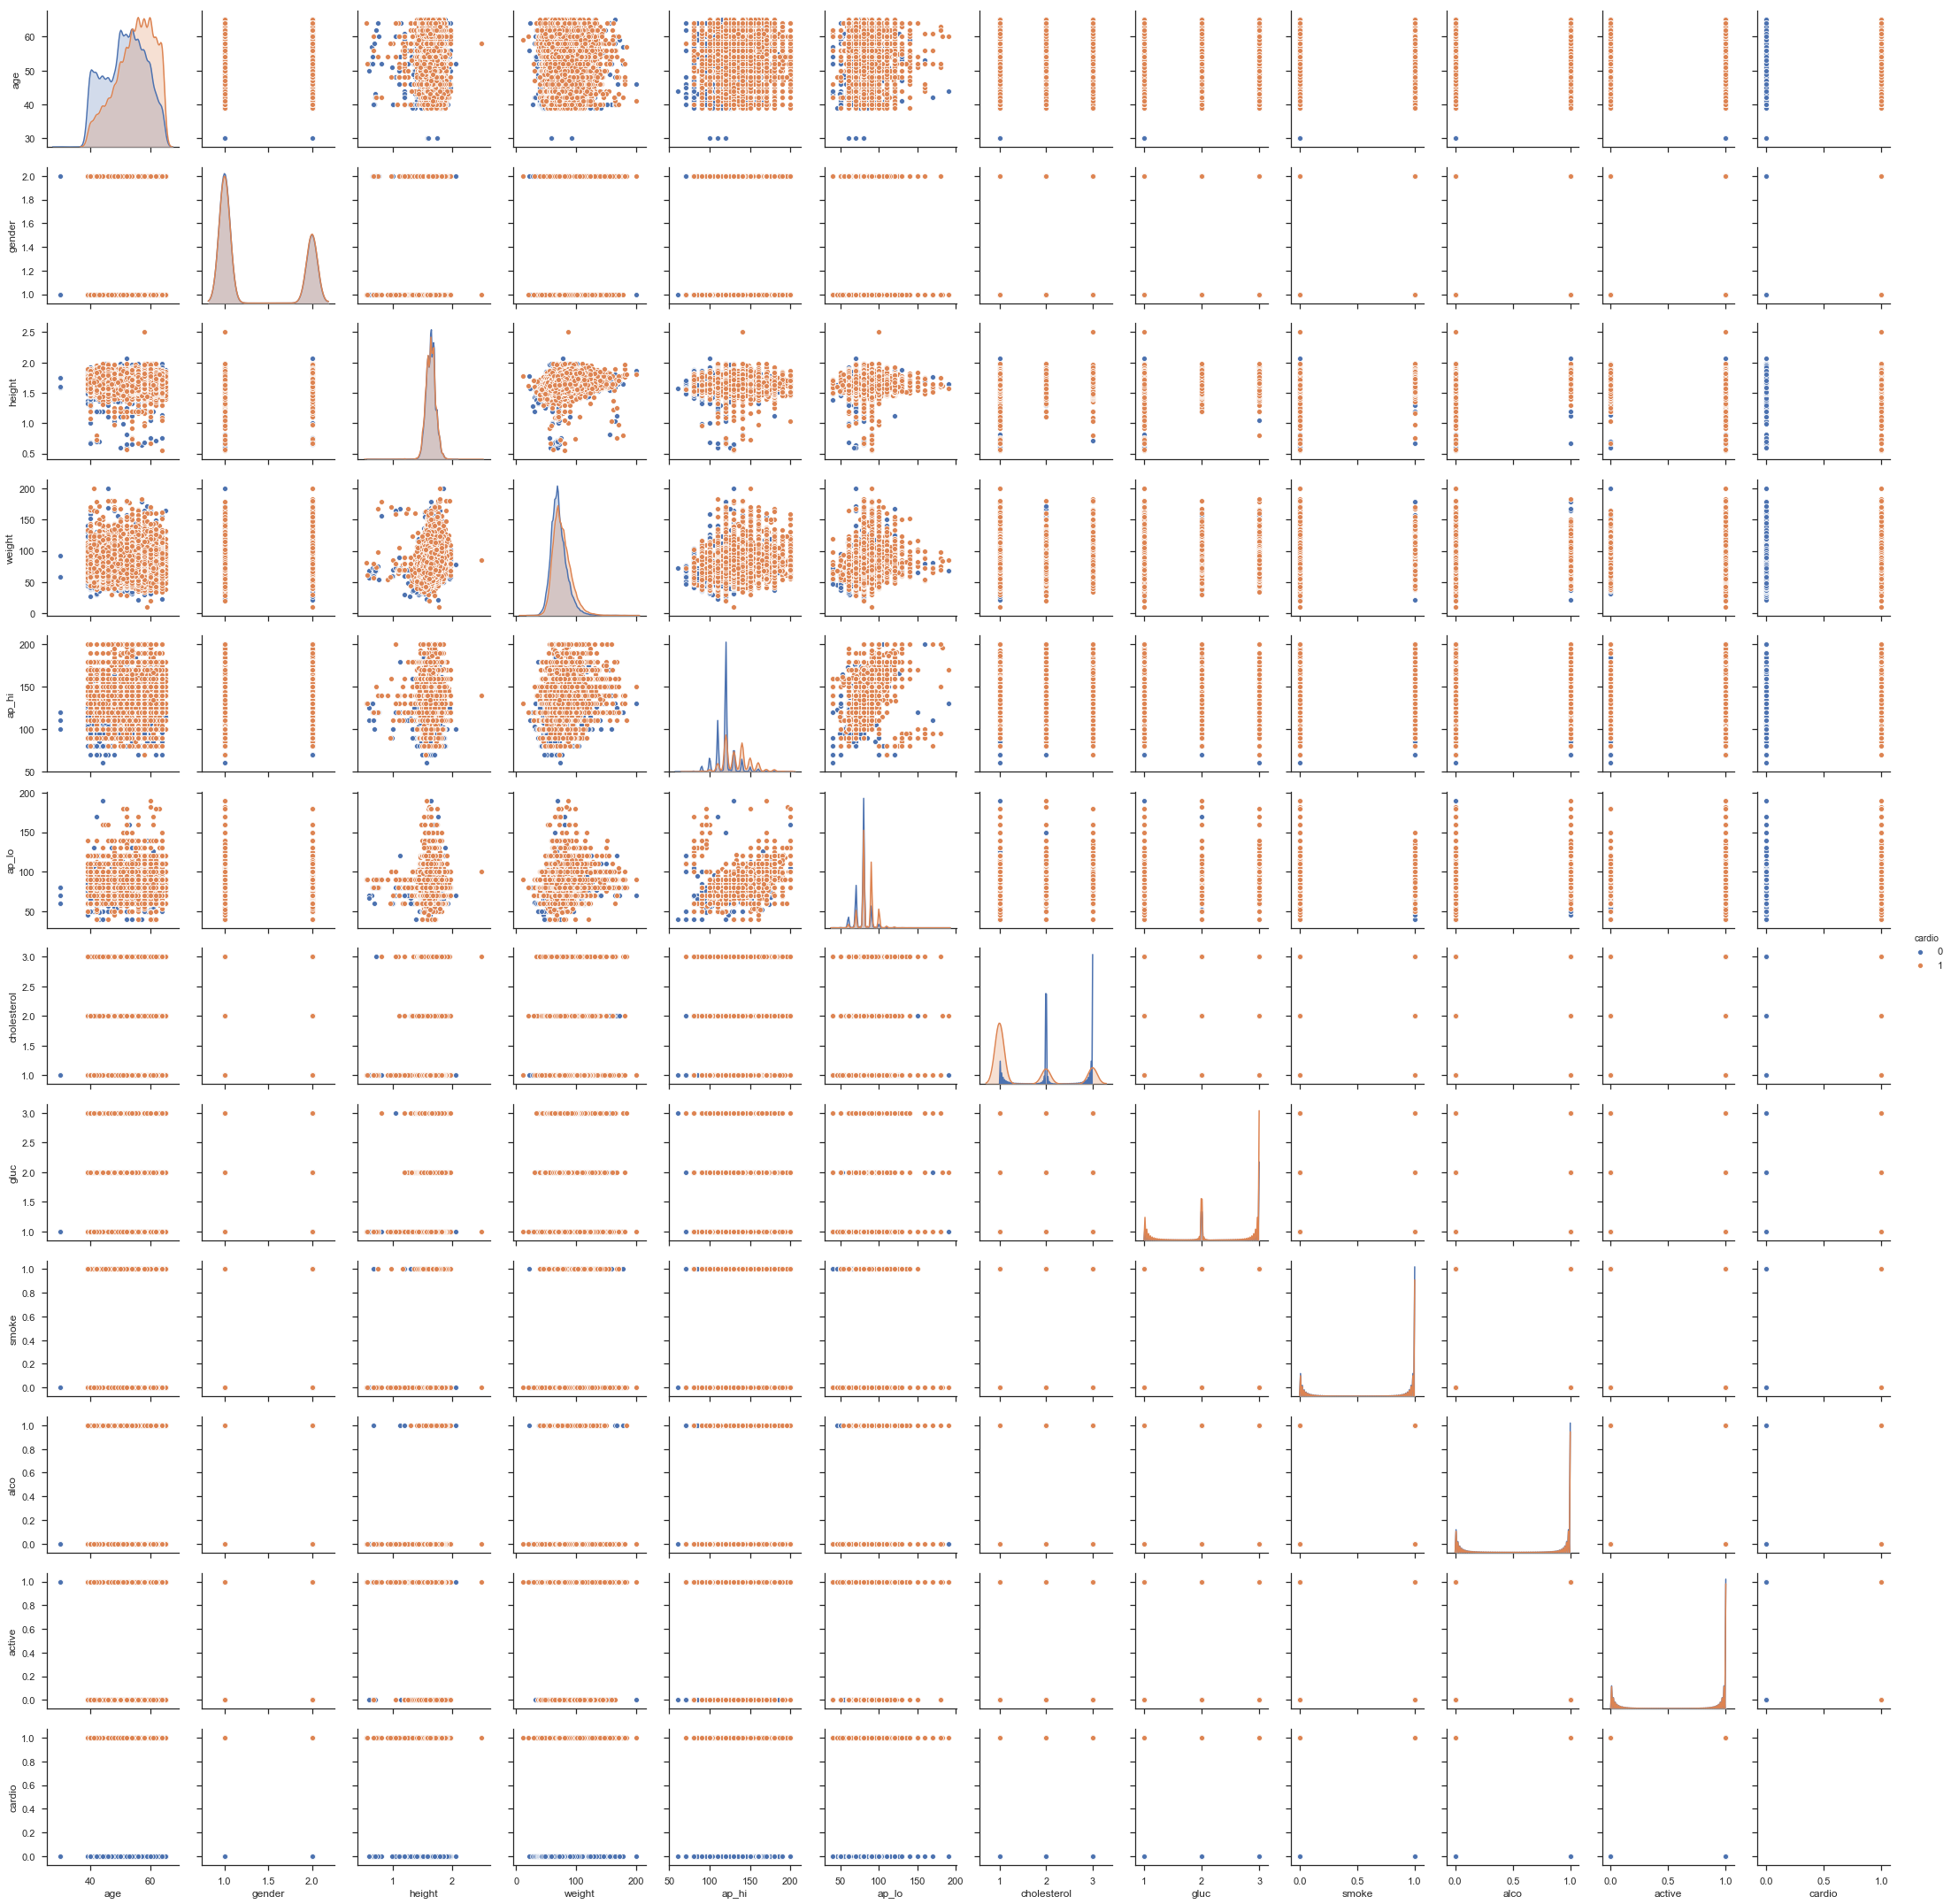

In [63]:
sns.pairplot(data=data, hue="cardio")

<Figure size 792x576 with 0 Axes>

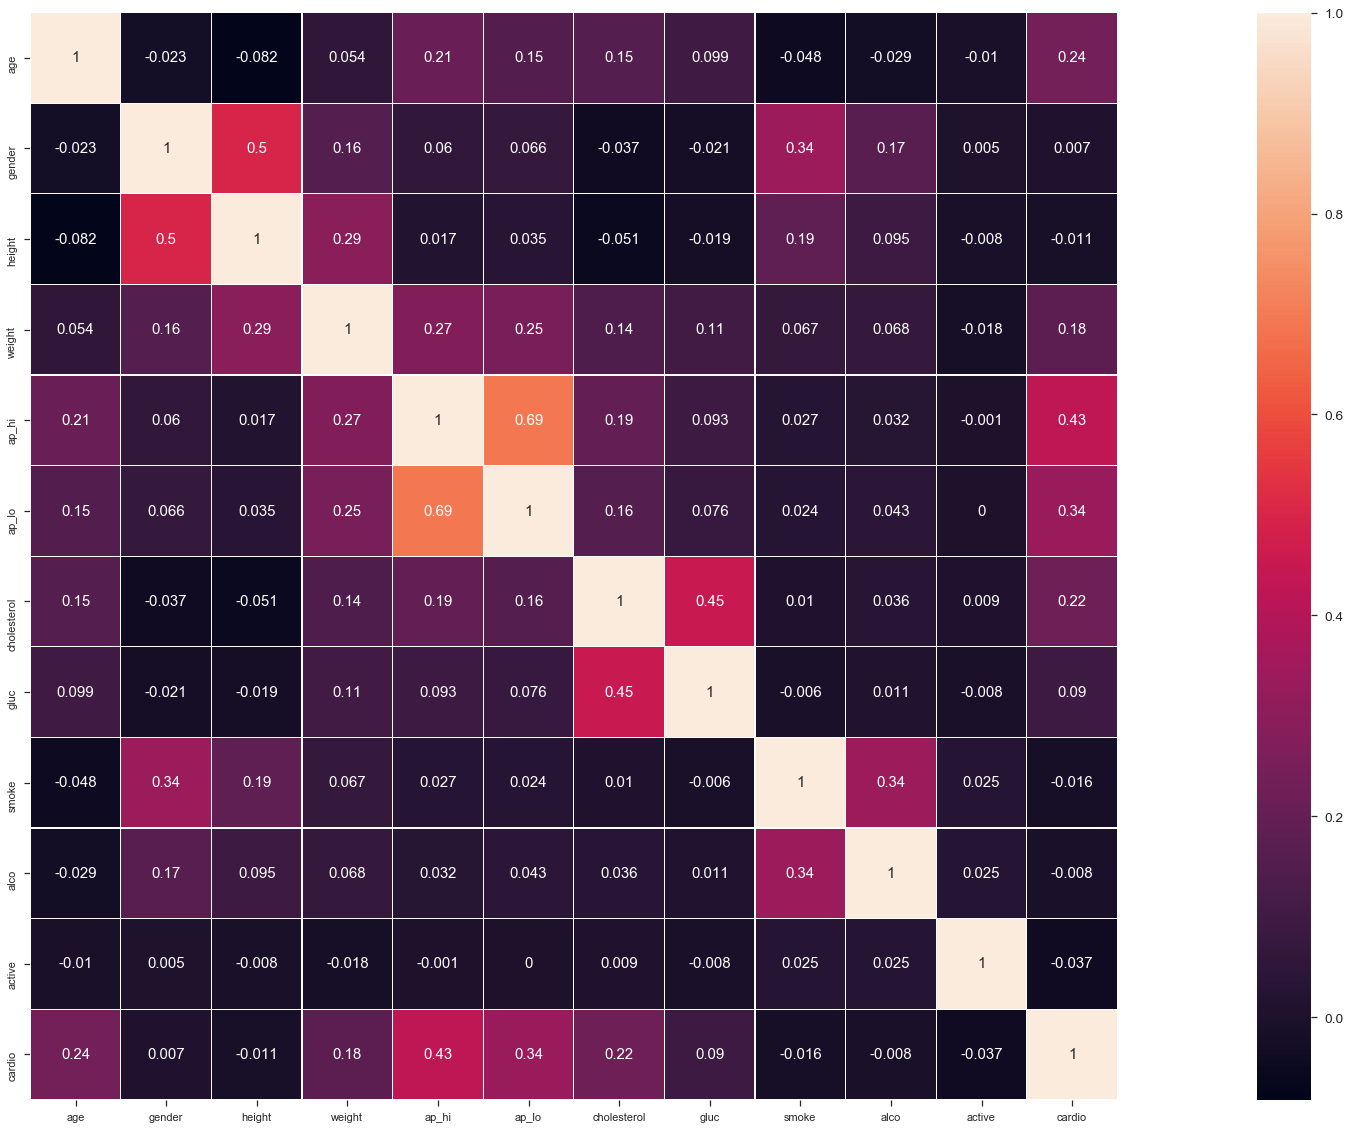

In [64]:
plt.figure(6)
fig, ax = plt.subplots(figsize=(50, 20))
corr = data.corr()
sns.set(font_scale=1.25)
sns.heatmap(round(corr,3),linewidths=0.1,vmax=1.0, 
            square=True,linecolor='white', annot=True)

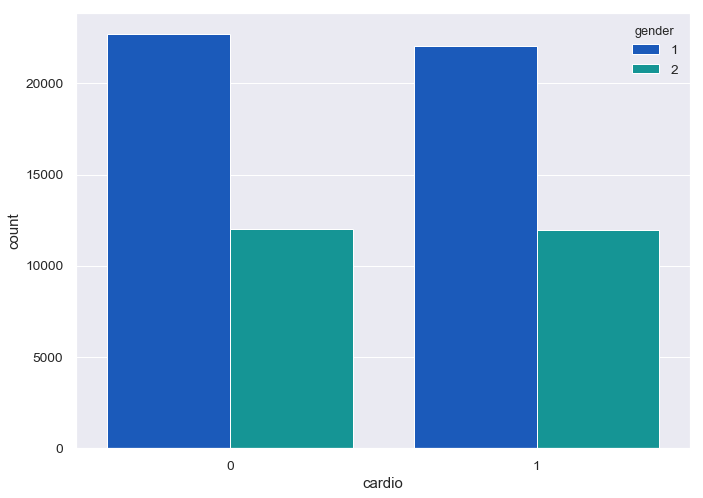

In [65]:
sns.countplot(x='cardio',data=data,hue='gender',palette='winter')

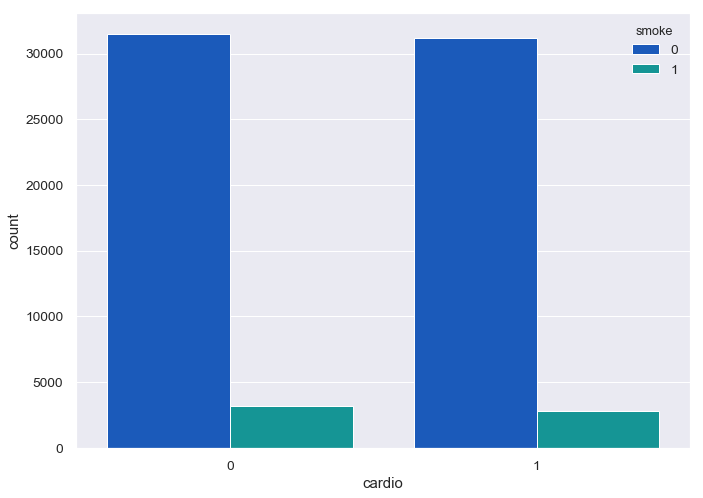

In [66]:
sns.countplot(x='cardio',data=data,hue='smoke',palette='winter')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001954BD8AB38>],
      dtype=object)

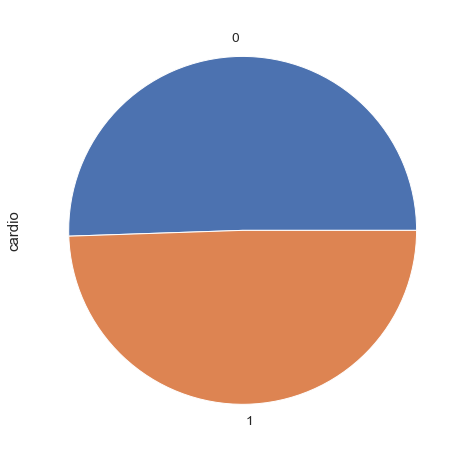

In [67]:
data["cardio"].value_counts().plot(kind='pie', subplots=True, figsize=(8, 8))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001954BDBABA8>],
      dtype=object)

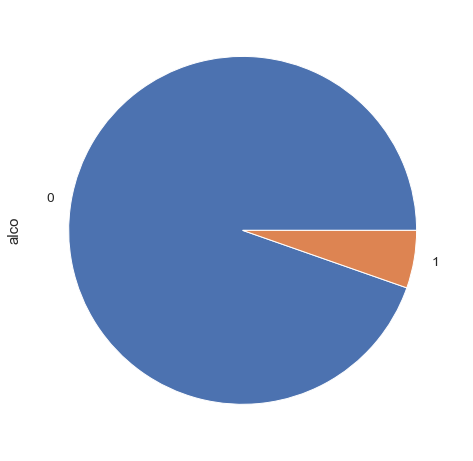

In [68]:
data["alco"].value_counts().plot(kind='pie', subplots=True, figsize=(8, 8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001954BDF5630>],
      dtype=object)

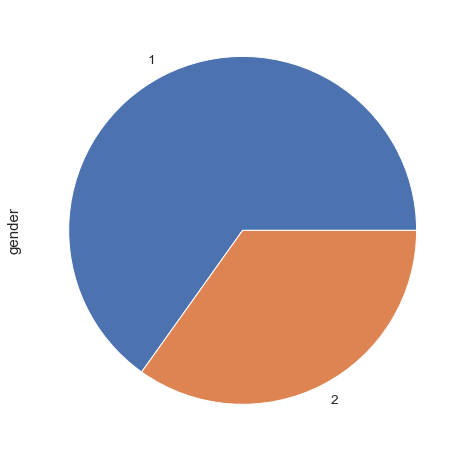

In [69]:
data["gender"].value_counts().plot(kind='pie', subplots=True, figsize=(8, 8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001954BE322B0>],
      dtype=object)

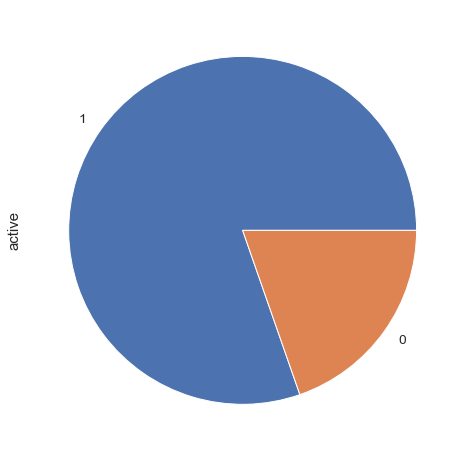

In [70]:
data["active"].value_counts().plot(kind='pie', subplots=True, figsize=(8, 8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001954BE60B38>],
      dtype=object)

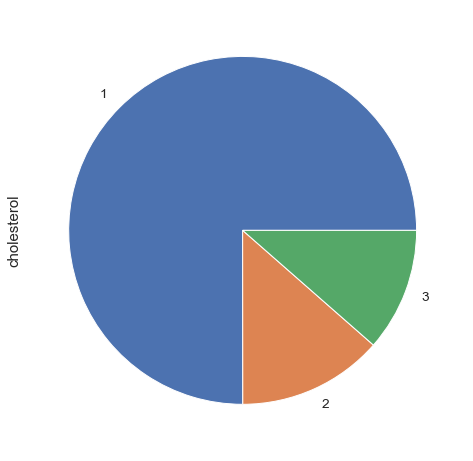

In [71]:
data["cholesterol"].value_counts().plot(kind='pie', subplots=True, figsize=(8, 8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001954BE9AB00>],
      dtype=object)

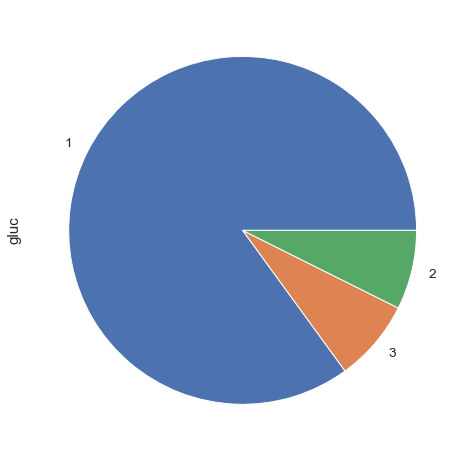

In [72]:
data["gluc"].value_counts().plot(kind='pie', subplots=True, figsize=(8, 8))

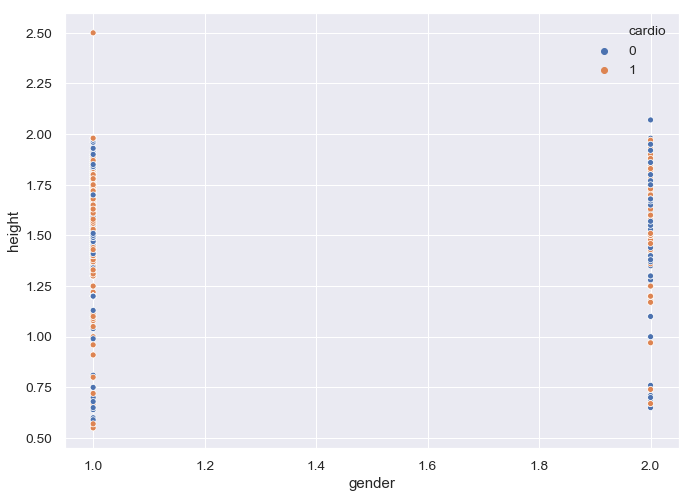

In [73]:
ax = sns.scatterplot(x="gender", y="height",hue='cardio', data=data)

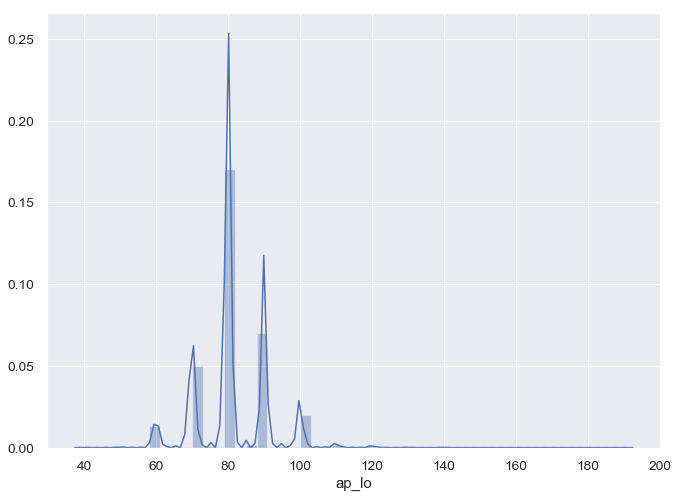

In [74]:
sns.distplot(data['ap_lo'])

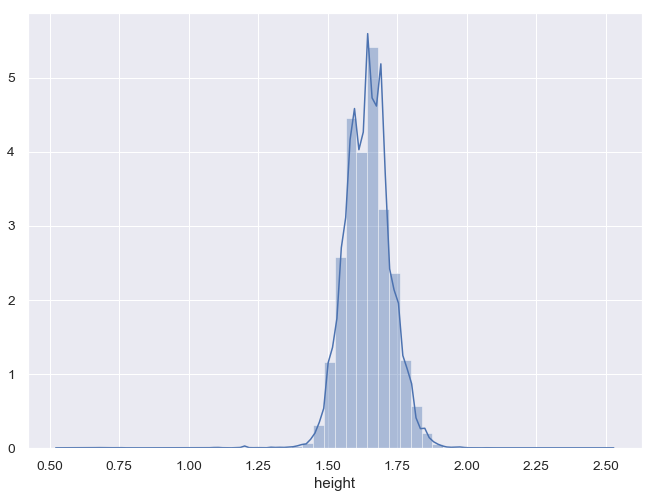

In [75]:
sns.distplot(data['height'])

##  train_test_split

In [76]:
from sklearn.model_selection import train_test_split

#### Now, we split the dataset into our input features and the label we wish to predict.

In [51]:
data_copy=data.copy()

y=data['cardio'].copy()


In [85]:
X=data_copy.drop("cardio", axis=1)

## Rescaling X 
Scaling the data speeds up training.

In [136]:
X_train =X.astype('float32')

In [137]:
#### We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)

In [138]:
X_train

array([[0.57142857, 1.        , 0.57948715, ..., 0.        , 0.        ,
        1.        ],
       [0.71428571, 0.        , 0.51794869, ..., 0.        , 0.        ,
        1.        ],
       [0.62857143, 0.        , 0.56410255, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.62857143, 1.        , 0.65641028, ..., 0.        , 1.        ,
        0.        ],
       [0.88571429, 0.        , 0.55384615, ..., 0.        , 0.        ,
        0.        ],
       [0.74285714, 0.        , 0.58974361, ..., 0.        , 0.        ,
        1.        ]])

In [139]:
print(X_train.shape)

(68723, 11)


### Categorical encoding y
This way our output layer will have 2 neurons, where each neuron corresponds to a different number.

In [140]:
y_train_encoding= tensorflow.keras.utils.to_categorical(y,num_classes=2,dtype='float32')
print(type(y_train_encoding))

<class 'numpy.ndarray'>


##  train_test_split

#### Lastly, we wish to set aside some parts of our dataset for a validation set and a test set. We use the function train_test_split from scikit-learn to do that

In [141]:
# Now we can begin with the modeling portion. First we need to convert the data from a dataframe to an array of numbers.
x_train, x_test, y_train, y_test = train_test_split(X_train, y_train_encoding, test_size = 0.25, random_state = 42)

In [142]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(51542, 11) (51542, 2) (17181, 11) (17181, 2)


In [143]:
print(type(x_train), type(y_train), type(x_test), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


## Building and Training Our Neural Network
The core data structure of Keras is a model, a way to organize layers. The simplest type of model is the [Sequential model](https://keras.io/models/sequential/), a linear stack of layers. For more complex architectures, you should use the Keras functional API, which allows to build arbitrary graphs of layers.

In [144]:
model = Sequential()

In [145]:
#get number of columns in training data
n_cols = x_train.shape[1]
model = Sequential([
    Dense(4, activation='sigmoid', input_shape=(n_cols,)), #input shape +first hiddden layer
    Dense(2, activation='sigmoid')   
    
])
# now the model will take as input arrays of shape (n_cols,)and output arrays of shape (2,)
# **Sigmoid :**  
# The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, 
# it is especially used for models where we have to predict the probability as an output.Since 
# probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.


In [146]:
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [147]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 4)                 48        
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 10        
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


In [148]:
model.fit(x_train,y_train,epochs = 40)

Epoch 1/40
51542/51542 [==============================] - 2s 44us/sample - loss: 0.6794 - accuracy: 0.6078
Epoch 2/40
51542/51542 [==============================] - 2s 46us/sample - loss: 0.6359 - accuracy: 0.6435
Epoch 3/40
51542/51542 [==============================] - 2s 40us/sample - loss: 0.6038 - accuracy: 0.6814
Epoch 4/40
51542/51542 [==============================] - 2s 41us/sample - loss: 0.5833 - accuracy: 0.7053
Epoch 5/40
51542/51542 [==============================] - 2s 46us/sample - loss: 0.5714 - accuracy: 0.7171
Epoch 6/40
51542/51542 [==============================] - 2s 40us/sample - loss: 0.5654 - accuracy: 0.7224
Epoch 7/40
51542/51542 [==============================] - 2s 40us/sample - loss: 0.5626 - accuracy: 0.7242
Epoch 8/40
51542/51542 [==============================] - 2s 41us/sample - loss: 0.5613 - accuracy: 0.7251
Epoch 9/40
51542/51542 [==============================] - 2s 41us/sample - loss: 0.5609 - accuracy: 0.7250
Epoch 10/40
51542/51542 [============

## Evaluating the model

In [149]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions = model.predict(x_test)
print("x_test",type(x_test))
print("x_test",x_test.shape)
print(type(predictions))
print(predictions.shape)
print("Accuracy: %", accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1)) * 100)

correct_preds = (y_test.argmax(axis=1) == predictions.argmax(axis=1))
print("That means that out of", y_test.shape[0] ,"test samples, this model got", 
      np.where(correct_preds)[0].size, "correct and",
      np.where(~correct_preds)[0].size, "incorrect")


x_test <class 'numpy.ndarray'>
x_test (17181, 11)
<class 'numpy.ndarray'>
(17181, 2)
Accuracy: % 72.96432105232525
That means that out of 17181 test samples, this model got 12536 correct and 4645 incorrect


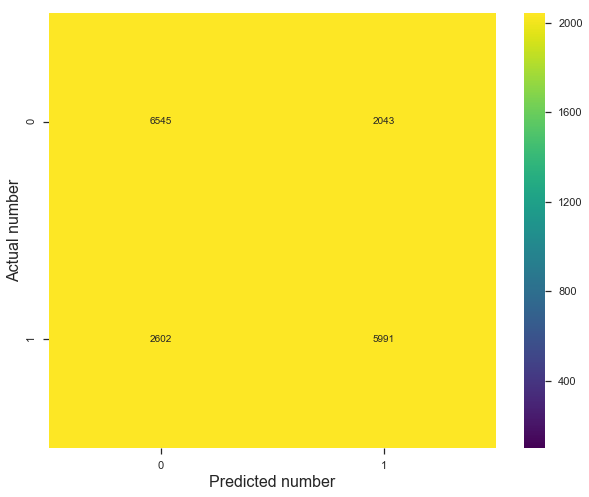

In [150]:
import seaborn as sns
# Import matplotlib
import matplotlib.pyplot as plt 
cm = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, cmap="viridis", vmax=100, annot=True, fmt='g')
plt.gca().set_xlabel("Predicted number", fontsize=16)
plt.gca().set_ylabel("Actual number", fontsize = 16)
plt.show()